<img src='../img/joint_school_banner_2.png' alt='joint school banner' align='right' width='100%'></img>

<br>

# Metop-B IASI Level 2 - Total Column Sulphur Dioxide

### About

The [Infrared Atmospheric Sounding Interferometer (IASI)](https://www.eumetsat.int/website/home/Satellites/CurrentSatellites/Metop/MetopDesign/IASI/index.html) is an instrument onboard the Metop-A/B/C satellites. It provides information on the vertical structure of temperature and humidity as well as main atmospheric species.

This notebook provides you an introduction to data from the Metop-B IASI instrument, featuring the Honga Tonga eruption on 15 January 2022. 

### Basic Facts

> **Spatial resolution**: `4 x 12-km coverage close to the centre of a 48 x 48 km2 cell (average sampling distance: 24 km)` <br>
> **Spatial coverage**: `Near global` <br>
> **Revisit time**:  `less than one day` <br>
> **Data availability**: `since 2007`


### How to access the data

IASI Level 2 are disseminated in the `netCDF` format and can be downloaded via the [IASI portal](https://iasi.aeris-data.fr/).

### Module outline
* [1 - Load and browse IASI Total Column Sulphur Dioxide data](#load_browse_iasi)
* [2 - Retrieve the variable 'SO2_interpolated' as xarray.DataArray](#data_retrieve_iasi)
* [3 - Mask Total Column Sulphur Dioxide data by quality flag](#quality_mask_iasi)
* [4 - Convert units of Total Column Sulphur Dioxide data](#convert_units_iasi)
* [5 - Visualize IASI Total Column Sulphur Dioxide](#visualize_iasi)

<hr>

#### Load required libraries

In [1]:
import os

import xarray as xr
from datetime import datetime
import numpy as np

# Python libraries for visualization
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.cm as cm
from matplotlib.axes import Axes

import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

#### Load helper functions

In [2]:
%run ../functions.ipynb

<hr>

## <a id='load_browse_iasi'></a>1. Load and browse IASI Total Column Sulphur Dioxide data

You can use the Python library [xarray](http://xarray.pydata.org/en/stable/index.html) to access and manipulate datasets in `netCDF` format.

Xarray's function `xr.open_dataset()` enables you to open a `netCDF` file. Once loaded, you can inspect the data structure.

You see, that the data is a one-dimensional vector with more than 1 Million individual entries for the `time` dimension. `latitude`, `longitude` and other parameters are stored as individual data variables.

In [4]:
iasi_file = xr.open_dataset('../../eodata/training_school/iasi/level2/so2/metop-b/2022/01/15/IASI_METOPB_L2_SO2_20220115_ULB-LATMOS_V2.1.0.nc')
iasi_file

<xarray.Dataset>
Dimensions:              (time: 1288565, nlevels: 7)
Coordinates:
  * time                 (time) float64 4.746e+08 4.746e+08 ... 4.747e+08
Dimensions without coordinates: nlevels
Data variables: (12/14)
    time_string          (time) |S16 ...
    time_in_day          (time) float64 ...
    latitude             (time) float32 ...
    longitude            (time) float32 ...
    sun_zen_angle        (time) float32 ...
    satellite_zen_angle  (time) float32 ...
    ...                   ...
    pixel_number         (time) int16 ...
    fov_number           (time) int16 ...
    AMPM                 (time) int16 ...
    SO2_all_altitudes    (time, nlevels) float32 ...
    SO2_interpolated     (time) float32 ...
    SO2_vertical_level   (time) float32 ...
Attributes: (12/29)
    title:                       IASI/Metop-B ULB-LATMOS sulfur dioxide (SO2)...
    institution:                 ULB-LATMOS
    product_version:             2.1.0
    history:                     2022-01-16 06:35:07 - Product generated with...
    summary:                     This dataset contains Level-2 sulfur dioxide...
    source:                      Eumetsat IASI Level-1C data (version 4 up to...
    ...                          ...
    platform:                    Metop-B
    sensor:                      IASI
    spatial_resolution:          12km at nadir
    creator_name:                L. Clarisse (ULB, data PI, lclariss@ulb.ac.b...
    contact_email:               contact form at http://iasi.aeris-data.fr/co...
    data_policy:                 see https://iasi.aeris-data.fr/data-use-policy/

Let us assign `latitude` and `longitude` as coordinates. In this way, you can use the geolocation information later. You can use the xarray function `assign_coords()` to assign the two variables as coordinates.

In [24]:
iasi_file = iasi_file.assign_coords({'latitude':iasi_file.latitude, 'longitude':iasi_file.longitude})
iasi_file

<xarray.Dataset>
Dimensions:              (time: 1288565, nlevels: 7)
Coordinates:
  * time                 (time) float64 4.746e+08 4.746e+08 ... 4.747e+08
    latitude             (time) float32 ...
    longitude            (time) float32 ...
Dimensions without coordinates: nlevels
Data variables:
    time_string          (time) |S16 ...
    time_in_day          (time) float64 ...
    sun_zen_angle        (time) float32 ...
    satellite_zen_angle  (time) float32 ...
    orbit_number         (time) int32 ...
    scanline_number      (time) int16 ...
    pixel_number         (time) int16 ...
    fov_number           (time) int16 ...
    AMPM                 (time) int16 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1
    SO2_all_altitudes    (time, nlevels) float32 ...
    SO2_interpolated     (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    SO2_vertical_level   (time) float32 ...
Attributes: (12/29)
    title:                       IASI/Metop-B ULB-LATMOS sulfur dioxide (SO2)...
    institution:                 ULB-LATMOS
    product_version:             2.1.0
    history:                     2022-01-16 06:35:07 - Product generated with...
    summary:                     This dataset contains Level-2 sulfur dioxide...
    source:                      Eumetsat IASI Level-1C data (version 4 up to...
    ...                          ...
    platform:                    Metop-B
    sensor:                      IASI
    spatial_resolution:          12km at nadir
    creator_name:                L. Clarisse (ULB, data PI, lclariss@ulb.ac.b...
    contact_email:               contact form at http://iasi.aeris-data.fr/co...
    data_policy:                 see https://iasi.aeris-data.fr/data-use-policy/

## <a id='data_retrieve_iasi'></a>2. Retrieve the variable 'SO2_interpolated' as xarray.DataArray

You can specify one variable of interest by putting the name of the variable into square brackets `[]` and get more detailed information about the variable. Let us select `SO2_interpolated`, which holds data values for total column Sulphur Dioxide.

In [25]:
so2 = iasi_file['SO2_interpolated']
so2

<xarray.DataArray 'SO2_interpolated' (time: 1288565)>
array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)
Coordinates:
  * time       (time) float64 4.746e+08 4.746e+08 ... 4.747e+08 4.747e+08
    latitude   (time) float32 ...
    longitude  (time) float32 ...
Attributes:
    long_name:                                              SO2 interpolated ...
    units:                                                  mol m-2
    multiplication_factor_to_convert_to_molecules_per_cm2:  6.02214179e+19
    multiplication_factor_to_convert_to_DU:                 2238.7144200743496

## <a id='quality_mask_iasi'></a> 3. Mask Total Column Sulphur Dioxide data by AM/PM flag

### Load AM/PM information

The IASI Level 2 data files provide you information on whether the data was from the AM or PM local time for each data point. 

You can load the quality flag variable `retrieval_quality_flag` from the data file. The pixels with a `AM/PM flag = 0` are the pixels captured in the AM at local time. Pixels with a `AM/PM flag = 1`, reflecting pixels captured in the PM at local time, shall be masked out.

In [26]:
ampm = iasi_file['AMPM']
ampm

<xarray.DataArray 'AMPM' (time: 1288565)>
array([0, 0, 0, ..., 1, 1, 1], dtype=int16)
Coordinates:
  * time       (time) float64 4.746e+08 4.746e+08 ... 4.747e+08 4.747e+08
    latitude   (time) float32 ...
    longitude  (time) float32 ...
Attributes:
    long_name:  AM/PM flag based on local time
    comment:    AM/PM = 0 for AM data, AM/PM = 1 for PM data

### Mask the Total Column Sulphur Dioxide data

The AMPM flag information can now be used to mask the `xarray.DataArray` with the data values. You can make use of the function [generate_masked_array](../functions.ipynb#generate_masked_array), where you can specify which pixels shall remain and which ones shall be eliminated. All data points with a `AMPM flag = 0` shall be kept, all others shall be masked out.

You see that the number of data points reduced to around 600,000 instead of more than 1,200,000.

In [27]:
iasi_so2_masked = generate_masked_array(xarray=so2,
                                       mask=ampm,
                                       threshold=0,
                                       operator='=')
iasi_so2_masked

<xarray.DataArray (time: 645419)>
array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)
Coordinates:
  * time       (time) float64 4.746e+08 4.746e+08 ... 4.747e+08 4.747e+08
    latitude   (time) float32 -38.66 -38.82 -38.87 ... -88.82 -88.91 -88.73
    longitude  (time) float32 134.1 134.1 134.3 134.3 ... -99.26 -112.4 -92.11
Attributes:
    long_name:                                              SO2 interpolated ...
    units:                                                  mol m-2
    multiplication_factor_to_convert_to_molecules_per_cm2:  6.02214179e+19
    multiplication_factor_to_convert_to_DU:                 2238.7144200743496

## <a id='convert_units_iasi'></a>4. Convert units of Total Column Sulphur Dioxide data

The last step before visualizing the total column Sulphur Dioxide information is to convert the data from `mol/m2` to `molecules/cm2`. The loaded data variable `SO2` has an attribute called `multiplication_factor_to_convert_to_molecules_per_cm2`, which is used to convert the data values.

In [28]:
iasi_so2_masked_converted = iasi_so2_masked*so2.multiplication_factor_to_convert_to_DU
iasi_so2_masked_converted 

<xarray.DataArray (time: 645419)>
array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)
Coordinates:
  * time       (time) float64 4.746e+08 4.746e+08 ... 4.747e+08 4.747e+08
    latitude   (time) float32 -38.66 -38.82 -38.87 ... -88.82 -88.91 -88.73
    longitude  (time) float32 134.1 134.1 134.3 134.3 ... -99.26 -112.4 -92.11

## <a id='visualize_iasi'></a>5. Visualize IASI Total Column Sulphur Dioxide

You can visualize the IASI Total Column Sulphur Dioxide data with the function [visualize_scatter](../functions.ipynb#visualize_scatter), which uses matplotlib's `scatterplot` function. You can set an `Orthographic()` projection and focus on a region over the area affected by the Hunga Tonga eruption.

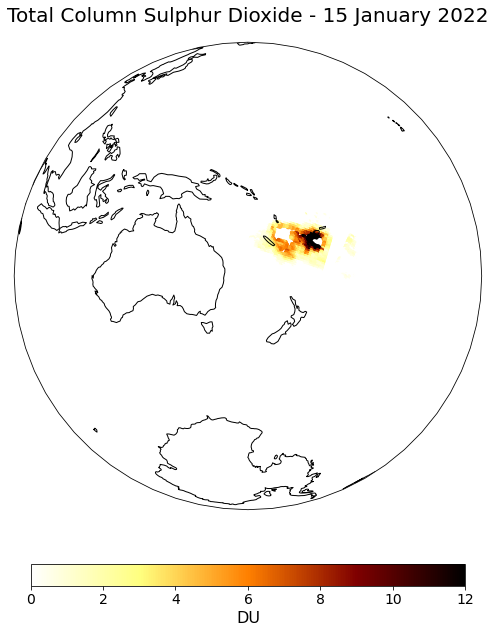

In [30]:
visualize_scatter(xr_dataarray=iasi_so2_masked_converted, 
                  conversion_factor=1,
                  projection=ccrs.Orthographic(160,-30), 
                  vmin=0, 
                  vmax=12, 
                  point_size=8, 
                  color_scale='afmhot_r', 
                  unit='DU', 
                  title='Total Column Sulphur Dioxide - 15 January 2022')

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="../LICENSE">MIT License</a>.</p>